# Линейная алгебра в контексте линейных методов. Часть 2

## Введение

### Задание 1.4
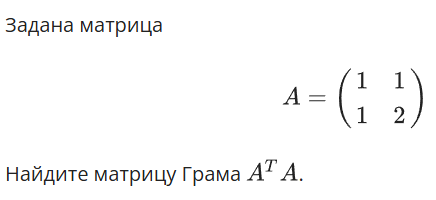

In [2]:
import numpy as np
import pandas as pd

In [3]:
A = np.matrix('1,1; 1,2')
print(A.T@A)

[[2 3]
 [3 5]]


### Задание 1.6
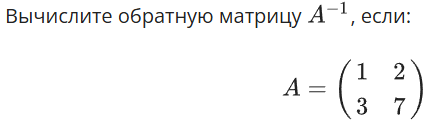

In [4]:
A = np.matrix('1,2; 3,7')
print(np.linalg.inv(A))

[[ 7. -2.]
 [-3.  1.]]


### Задание 1.7

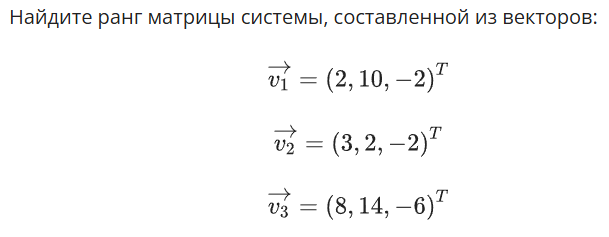

In [5]:
v1 = np.array([2,10,-2])
v2 = np.array([3,2,-2])
v3 = np.array([8,14,-6])

A = np.array([v1,v2,v3]).T

print(np.linalg.matrix_rank(A))

2


## Линейная регрессия по методу наименьших кадратов

In [6]:
# Решение задачи на Python

#Загружаем необходимые библиотеки

#Для работы с DataFrame
import pandas as pd
#Для работы с массивами
import numpy as np
#Для импорта данных
from sklearn import datasets
#Для визуализации статистических данных
import seaborn as sns
#Для построения графиков
import matplotlib.pyplot as plt

#Загружаем датасет
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 
                'RM', 'AGE', 'DIS', 'RAD', 'TAX', 
                'PTRATIO', 'B', 'LSTAT', 'PRICE']
boston_data = pd.read_csv('data/housing.csv',
                          header=None, delimiter=r'\s+', names=column_names)
display(boston_data.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
#Составляем матрицу А и вектор целевой переменной
CRIM = boston_data['CRIM']
RM = boston_data['RM']
A = np.column_stack((np.ones(506), CRIM, RM))
y = boston_data[['PRICE']]
print(A)
print(y)

[[1.0000e+00 6.3200e-03 6.5750e+00]
 [1.0000e+00 2.7310e-02 6.4210e+00]
 [1.0000e+00 2.7290e-02 7.1850e+00]
 ...
 [1.0000e+00 6.0760e-02 6.9760e+00]
 [1.0000e+00 1.0959e-01 6.7940e+00]
 [1.0000e+00 4.7410e-02 6.0300e+00]]
     PRICE
0     24.0
1     21.6
2     34.7
3     33.4
4     36.2
..     ...
501   22.4
502   20.6
503   23.9
504   22.0
505   11.9

[506 rows x 1 columns]


In [8]:
#Посмотрим на размерность матрицы А
print(A.shape)

(506, 3)


In [9]:
#Вычислим OLS-оценку для коэффициентов
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat.values)

[[-29.24471945]
 [ -0.26491325]
 [  8.39106825]]


In [10]:
#Составим прогноз нашей модели

#Добавим новые данные
CRIM_new = 0.1
RM_new = 8
#Делаем прогноз типичной стоимости дома
PRICE_new = w_hat.iloc[0] + w_hat.iloc[1]*CRIM_new + w_hat.iloc[2]*RM_new
print(PRICE_new.values)

[37.85733519]


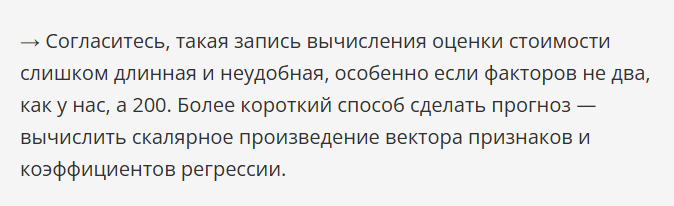

In [11]:
#Короткий способ сделать прогноз

#Оформим характеристики нового наблюдения в виде матрицы 
new= np.array([[1, CRIM_new, RM_new]])

print('prediction:', (new@w_hat).values)

prediction: [[37.85733519]]


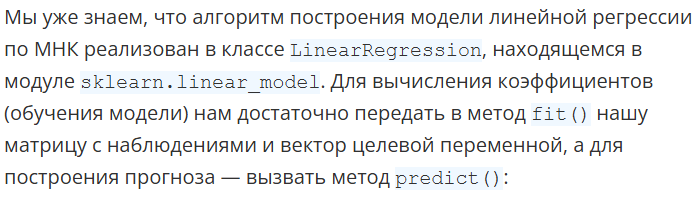

In [12]:
from sklearn.linear_model import LinearRegression

#Создаем модель линейной регрессии
model = LinearRegression(fit_intercept=False)

#Вычисляем коэффициенты регрессии
model.fit(A,y)
print('w_hat:', model.coef_)
new_prediction = model.predict(new)
print('prediction:', new_prediction)

w_hat: [[-29.24471945  -0.26491325   8.39106825]]
prediction: [[37.85733519]]


### Задание 3.5
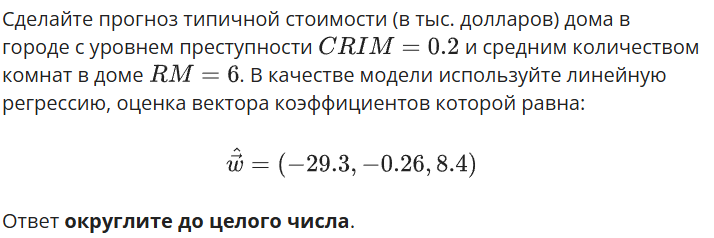

In [13]:
CRIM_new = 0.2
RM_new = 6

new = np.array([[1, CRIM_new, RM_new]])
new_prediction = model.predict(new)
print('prediction:', new_prediction)

prediction: [[21.04870738]]


### Проблемы в классической МНК-модели

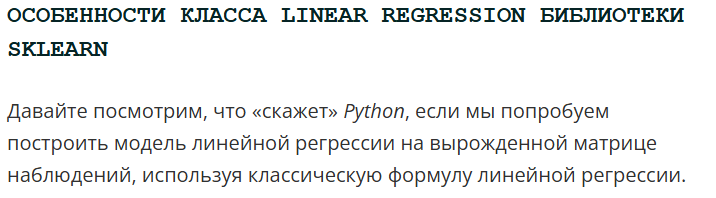

In [14]:
# Создадим вырожденную матрицу А

A = np.array([
    [1,1,1,1],
    [2,1,1,2],
    [-2,-1,-1,-2]]
).T
y=np.array([1,2,5,1])

#Вычислим OLS-оценку для коэффициентов
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat)

LinAlgError: Singular matrix

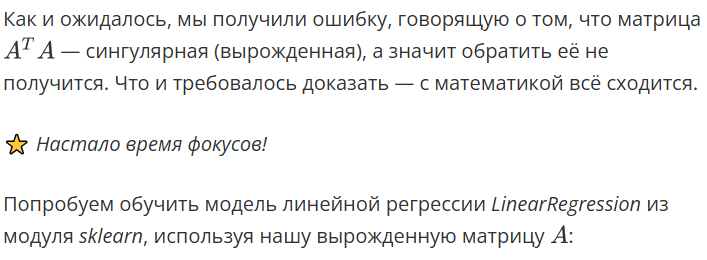

In [15]:
#Создаем модель линейной регрессии
model = LinearRegression(fit_intercept=False)
#Вычисляем коэффициенты регрессии
model.fit(A,y)
print('w_hat:', model.coef_)

w_hat: [ 6.   -1.25  1.25]


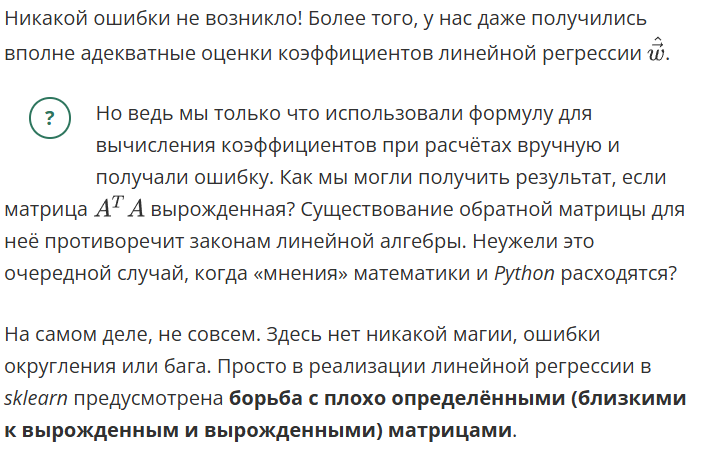

In [16]:
#Классическая OLS-регрессия в numpy с возможностью
#получения решения даже для вырожденных матриц
np.linalg.lstsq(A,y,rcond=None)

(array([ 6.  , -1.25,  1.25]),
 array([], dtype=float64),
 2,
 array([4.86435029, 0.58146041, 0.        ]))

In [17]:
A = np.array([[1,1,1,1],
              [1,1,0,2],
              [-1,1,0,0],
              [0,2,0,2]]
)

print(np.linalg.det(A))

0.0


## Стандартизация векторов и матрица корреляций

### Стандартизация векторов

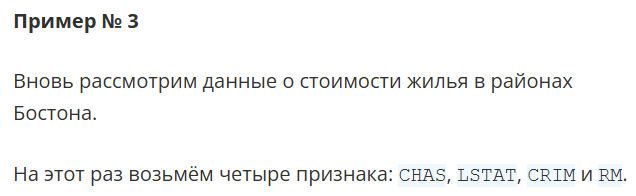

In [18]:
#Посмотрим на статистические характеристики с помощью метода describe()
boston_data[['CHAS', 'LSTAT', 'CRIM', 'RM']].describe()

,CHAS,LSTAT,CRIM,RM
count,506.000000,506.000000,506.000000,506.000000
mean,0.069170,12.653063,3.613524,6.284634
std,0.253994,7.141062,8.601545,0.702617
min,0.000000,1.730000,0.006320,3.561000
25%,0.000000,6.950000,0.082045,5.885500
50%,0.000000,11.360000,0.256510,6.208500
75%,0.000000,16.955000,3.677083,6.623500
max,1.000000,37.970000,88.976200,8.780000


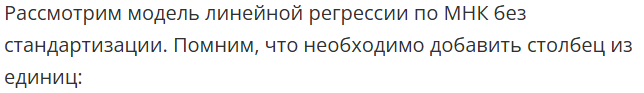

In [19]:
#Составляем таблицу наблюдений и вектор целевой переменной
A = np.column_stack((np.ones(506), boston_data[['CHAS', 'LSTAT', 'CRIM', 'RM']]))
y = boston_data[['PRICE']]

#Вычисляем OLS-оценку для коэффициентов без стандартизации
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat.values)

[[-1.92052548]
 [ 3.9975594 ]
 [-0.58240212]
 [-0.09739445]
 [ 5.07554248]]


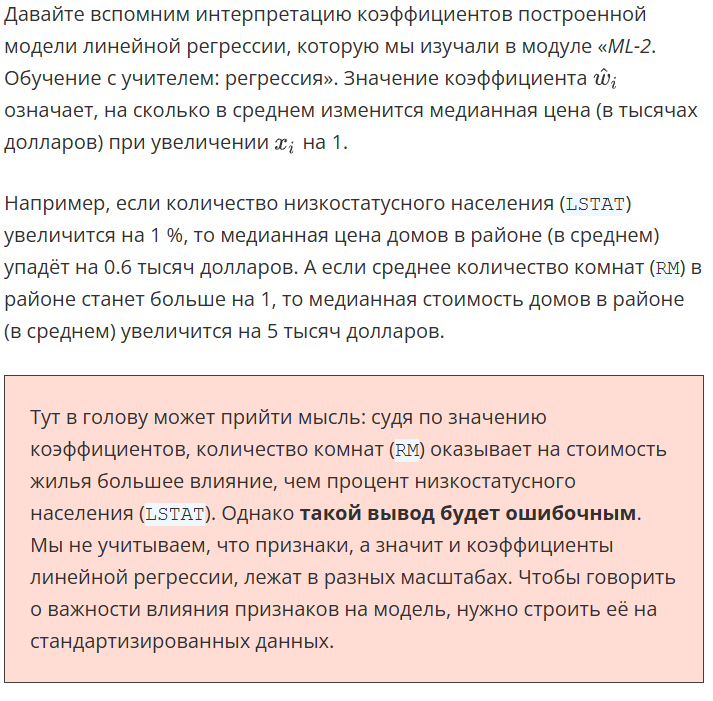

In [20]:
#Составляем матрицу наблюдений без дополнителного столбца из единиц
A = boston_data[['CHAS', 'LSTAT', 'CRIM', 'RM']]
y = boston_data[['PRICE']]
#Стандартизиоуем векторы в столбцах матрицы A
A_cent = A - A.mean(axis=0)
A_st = A_cent/np.linalg.norm(A_cent, axis=0)
A_st.describe().round(2)

,CHAS,LSTAT,CRIM,RM
count,506.00,506.00,506.00,506.00
mean,-0.00,-0.00,-0.00,-0.00
std,0.04,0.04,0.04,0.04
min,-0.01,-0.07,-0.02,-0.17
25%,-0.01,-0.04,-0.02,-0.03
50%,-0.01,-0.01,-0.02,-0.00
75%,-0.01,0.03,0.00,0.02
max,0.16,0.16,0.44,0.16


Теперь векторы имеют одинаковые средние значения и стандартные отклонения. Если вычислить длину каждого из векторов, мы увидим, что они будут равны 1

In [21]:
print(np.linalg.norm(A_st, axis=0))

[1. 1. 1. 1.]


Для получения стандартизированных коэффициентов нам также понадобится стандартизация целевой переменной  по тому же принципу

In [22]:
#Стандартизируем вектор целевой переменной
y_cent = y - y.mean()
y_st = y_cent/np.linalg.norm(y_cent)

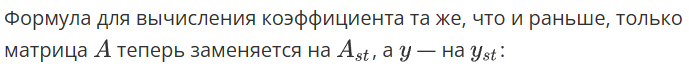

In [23]:
#Вычислим OLS-оценку для стандартизированных коэффициентов
w_hat_st = np.linalg.inv(A_st.T@A_st)@A_st.T@y_st
print(w_hat_st.values)

[[ 0.11039956]
 [-0.45220423]
 [-0.09108766]
 [ 0.38774848]]


Давайте поближе взглянем на матрицу Грама для стандартизированных факторов

In [24]:
#Матрица Грама
A_st.T@A_st

,CHAS,LSTAT,CRIM,RM
CHAS,1.000000,-0.053929,-0.055892,0.091251
LSTAT,-0.053929,1.000000,0.455621,-0.613808
CRIM,-0.055892,0.455621,1.000000,-0.219247
RM,0.091251,-0.613808,-0.219247,1.000000


### Задание 4.3
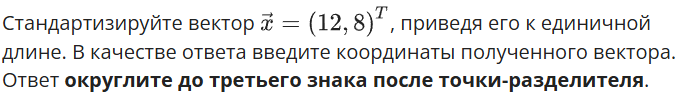

In [25]:
x = np.array([12,8])

x_cent = x - x.mean(axis=0)
x_st = x_cent/np.linalg.norm(x_cent, axis=0)
print(x_st)


[ 0.70710678 -0.70710678]


### Корреляционная матрица

In [26]:
#В NumPy матрица корреляций вычислсяется функцией np.corrcoef()

x_1 = np.array([1,2,6])
x_2 = np.array([3000,1000,2000])
np.corrcoef(x_1, x_2)

array([[ 1.        , -0.18898224],
       [-0.18898224,  1.        ]])

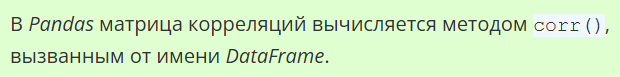

### Задание 4.7
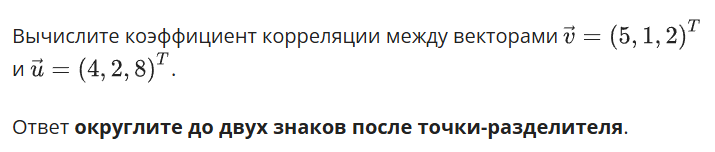

In [27]:
v = np.array([5,1,2])
u = np.array([4,2,8])
np.corrcoef(v,u)

array([[1.        , 0.05241424],
       [0.05241424, 1.        ]])

### Задание 4.8
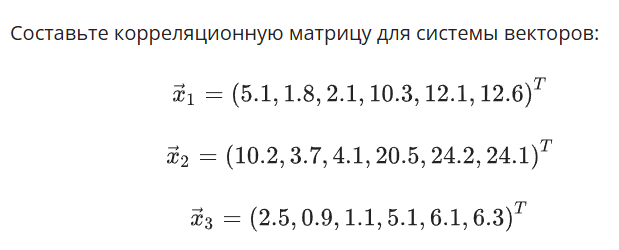

In [28]:
x_1 = np.array([5.1, 1.8, 2.1, 10.3, 12.1, 12.6])
x_2 = np.array([10.2, 3.7, 4.1, 20.5, 24.2, 24.1])
x_3 = np.array([2.5, 0.9, 1.1, 5.1, 6.1, 6.3])
df = pd.DataFrame({'x_1':[5.1, 1.8, 2.1, 10.3, 12.1, 12.6], 
                   'x_2':[10.2, 3.7, 4.1, 20.5, 24.2, 24.1],
                   'x_3': [2.5, 0.9, 1.1, 5.1, 6.1, 6.3]})
df_corr = df.corr()
df_corr_matrix = df_corr.values
display(df_corr)
display(df_corr_matrix)

,x_1,x_2,x_3
x_1,1.000000,0.999255,0.999837
x_2,0.999255,1.000000,0.999066
x_3,0.999837,0.999066,1.000000


array([[1.        , 0.99925473, 0.99983661],
       [0.99925473, 1.        , 0.99906626],
       [0.99983661, 0.99906626, 1.        ]])

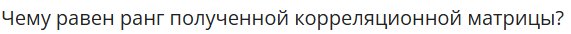

In [29]:
np.linalg.matrix_rank(df_corr_matrix)

3

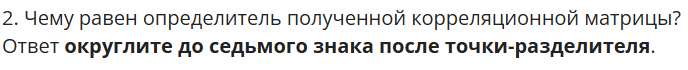

In [30]:
np.linalg.det(df_corr_matrix)

4.862298229242007e-07

## Полиномиальная регрессия



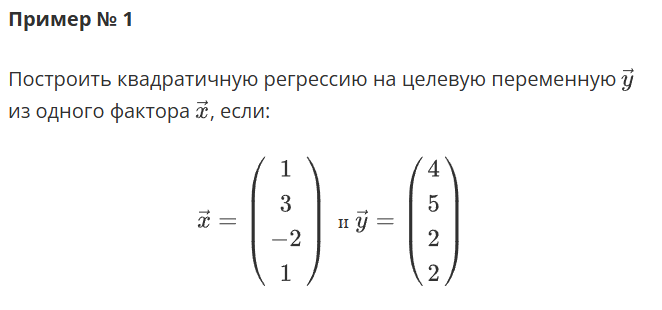
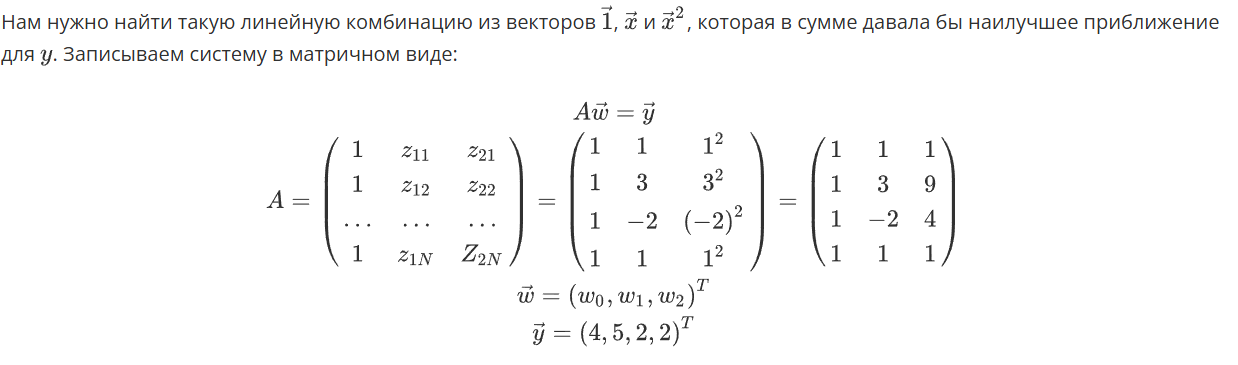

In [31]:
#Считаем на Python

A = np.array([
    [1,1,1,1],
    [1,3,-2,1],
    [1,9,4,1]
]).T
y= np.array([4,5,2,2])
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat)

[2.4        0.46666667 0.13333333]


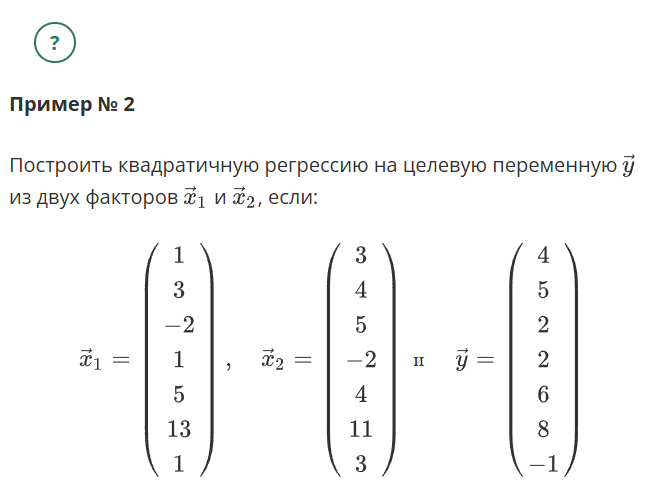
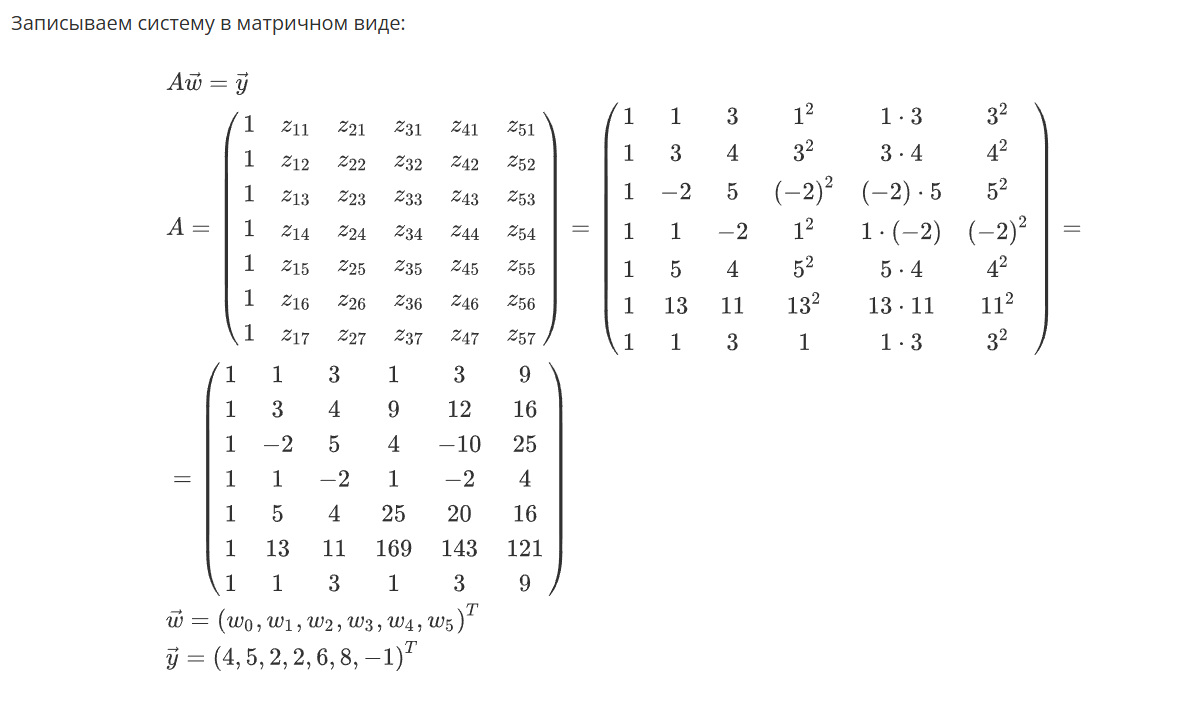

In [32]:
A = np.array([
    [1,1,1,1,1,1,1],
    [1,3,-2,1,5,13,1],
    [3,4,5,-2,4,11,3],
    [1,9,4,1,25,169,1],
    [3,12,-10,-2,20,143,3],
    [9,16,25,4,16,121,9]
]).T
y=np.array([4,5,2,2,6,8,-1])
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat)

[-2.25799015  2.37672337 -0.1322068  -0.10208147 -0.26501791  0.29722471]


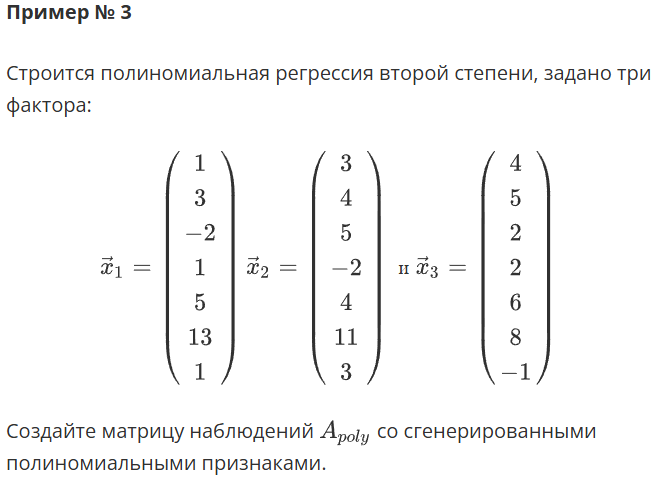

In [33]:
A = np.array([
    [1,3,-2,1,5,13,1],
    [3,4,5,-2,4,11,3],
    [4,5,2,2,6,8,-1]
]).T
print(A)

[[ 1  3  4]
 [ 3  4  5]
 [-2  5  2]
 [ 1 -2  2]
 [ 5  4  6]
 [13 11  8]
 [ 1  3 -1]]


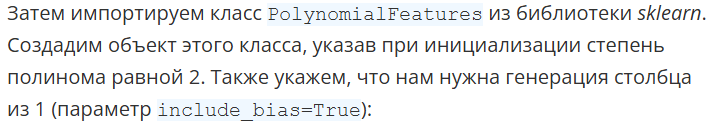

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)

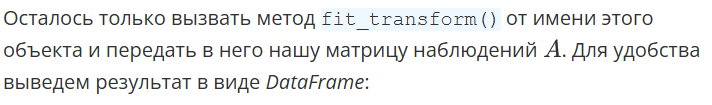

In [35]:
A_poly = poly.fit_transform(A)
display(pd.DataFrame(A_poly))

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,3.0,4.0,1.0,3.0,4.0,9.0,12.0,16.0
1,1.0,3.0,4.0,5.0,9.0,12.0,15.0,16.0,20.0,25.0
2,1.0,-2.0,5.0,2.0,4.0,-10.0,-4.0,25.0,10.0,4.0
3,1.0,1.0,-2.0,2.0,1.0,-2.0,2.0,4.0,-4.0,4.0
4,1.0,5.0,4.0,6.0,25.0,20.0,30.0,16.0,24.0,36.0
5,1.0,13.0,11.0,8.0,169.0,143.0,104.0,121.0,88.0,64.0
6,1.0,1.0,3.0,-1.0,1.0,3.0,-1.0,9.0,-3.0,1.0


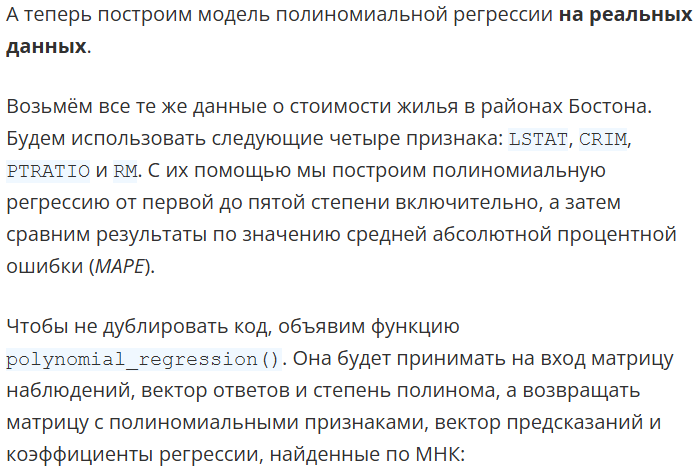

In [36]:
def polynomial_regression(X, y, k):
    poly = PolynomialFeatures(degree=k, include_bias=True)
    X_poly = poly.fit_transform(X)
    w_hat = np.linalg.inv(X_poly.T@X_poly)@X_poly.T@y
    y_pred = X_poly @ w_hat 
    return X_poly, y_pred, w_hat

In [37]:
#Выделяем интересующие нас признаки и строим полиномы
A = boston_data[['LSTAT', 'PTRATIO', 'RM', 'CRIM']]
y = boston_data[['PRICE']]

A_poly, y_pred, w_hat = polynomial_regression(A, y, 1)
A_poly2, y_pred2, w_hat2 = polynomial_regression(A, y, 2)
A_poly3, y_pred3, w_hat3 = polynomial_regression(A, y, 3)
A_poly4, y_pred4, w_hat4 = polynomial_regression(A, y, 4)
A_poly5, y_pred5, w_hat5 = polynomial_regression(A, y, 5)

In [38]:
#Посмотрим на качество построенных регрессий, вычислив метрику
from sklearn.metrics import mean_absolute_percentage_error

print('MAPE для полинома 1-й степени {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred)*100))
print('MAPE для полинома 2-й степени {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred2)*100))
print('MAPE для полинома 3-й степени {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred3)*100))
print('MAPE для полинома 4-й степени {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred4)*100))
print('MAPE для полинома 5-й степени {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred5)*100))

MAPE для полинома 1-й степени 18.20%
MAPE для полинома 2-й степени 13.41%
MAPE для полинома 3-й степени 12.93%
MAPE для полинома 4-й степени 10.72%
MAPE для полинома 5-й степени 470.54%


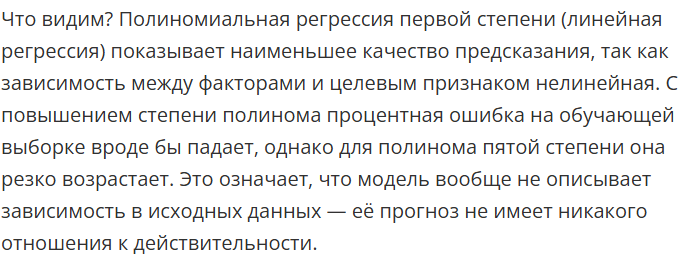

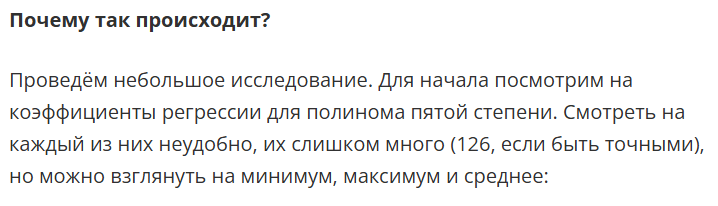

In [39]:
display(pd.DataFrame(w_hat5).describe())

,PRICE
count,126.000000
mean,1827.374637
std,45541.271004
min,-213771.933237
25%,-0.661564
50%,0.000009
75%,2.606294
max,457926.187798


Теперь давайте взглянем на корреляционную матрицу для факторов, на которых мы строим полином пятой степени. Корреляцию со столбцом из единиц считать бессмысленно, поэтому мы не будем его рассматривать. Для удобства расчёта матрицы корреляций обернём матрицу  в DataFrame и воспользуемся методом corr():

In [43]:
#Считаем матрицу корреляций (без столбца из единиц)
C = pd.DataFrame(A_poly5[:, 1:]).corr()

#Считаем ранг корреляционной матрицы
print('Ранг корреляционной матрицы:', np.linalg.matrix_rank(C))

#Считаем количество факторов (не включая столбец из единиц)
print('Количество факторов:', A_poly5[:, 1:].shape[1])

Ранг корреляционной матрицы: 110
Количество факторов: 125


Кстати, заметим, что, например, для полинома четвёртой степени ранг матрицы корреляций максимален, то есть равен количеству факторов (не включая единичный столбец):

In [44]:
#Считаем матрицу корреляций (без столбца из единиц)
C = pd.DataFrame(A_poly4[:, 1:]).corr()

#Считаем ранг корреляционной матрицы
print('Ранг корреляционной матрицы:', np.linalg.matrix_rank(C))

#Считаем количество факторов (не включая столбец из единиц)
print('Количество факторов:', A_poly4[:, 1:].shape[1])

Ранг корреляционной матрицы: 69
Количество факторов: 69


Поэтому и коэффициенты регрессии полинома четвёртой степени находятся в адекватных пределах.

In [45]:
display(pd.DataFrame(w_hat4).describe())

,PRICE
count,70.000000
mean,-50.817470
std,886.646328
min,-6919.292921
25%,-0.187941
50%,-0.000796
75%,0.322218
max,2304.985151


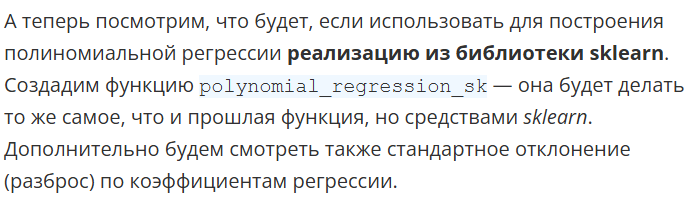

In [46]:
def polynomial_regression_sk(X, y, k):
    poly = PolynomialFeatures(degree=k, include_bias=True)
    X_poly = poly.fit_transform(X)
    lr = LinearRegression().fit(X_poly, y)
    y_pred = lr.predict(X_poly)
    return X_poly, y_pred, lr.coef_

A = boston_data[['LSTAT', 'PTRATIO', 'RM', 'CRIM']]
y = boston_data[['PRICE']]

for k in range(1,6):
    A_poly, y_pred, w_hat = polynomial_regression_sk(A, y, k)
    print('MAPE для полинома степени {} - {:.2f}%, СКО - {:.0f}'.format(
        k, mean_absolute_percentage_error(y, y_pred)*100, w_hat.std()
    ))

MAPE для полинома степени 1 - 18.20%, СКО - 2
MAPE для полинома степени 2 - 13.41%, СКО - 5
MAPE для полинома степени 3 - 12.93%, СКО - 9
MAPE для полинома степени 4 - 10.74%, СКО - 302
MAPE для полинома степени 5 - 8.98%, СКО - 289


### Зададние 6.1
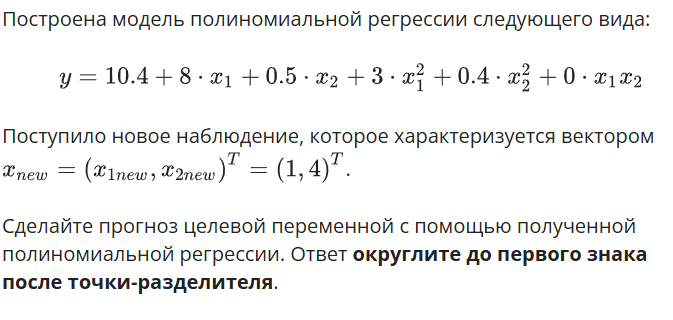

In [55]:
#Исходные данные
w_hat = np.array([10.4, 8, 0.5, 3, 0, 0.4])
x_new = np.array([[1, 4]])

#Создание полиномиальных признаков
poly = PolynomialFeatures(degree=2, include_bias=True)
x_poly_new = poly.fit_transform(x_new)
display(x_poly_new)
display(w_hat)


y_pred_new = x_poly_new @ w_hat
print(y_pred_new)

array([[ 1.,  1.,  4.,  1.,  4., 16.]])

array([10.4,  8. ,  0.5,  3. ,  0. ,  0.4])

[29.8]


### Задание 6.2
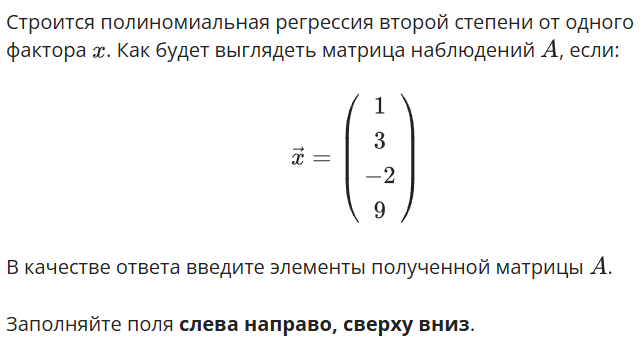

In [63]:
A = np.array([[1,3,-2,9]]).T

poly = PolynomialFeatures(degree=2, include_bias=True)
A_poly = poly.fit_transform(A)
display(A_poly)

array([[ 1.,  1.,  1.],
       [ 1.,  3.,  9.],
       [ 1., -2.,  4.],
       [ 1.,  9., 81.]])

### Задание 6.4
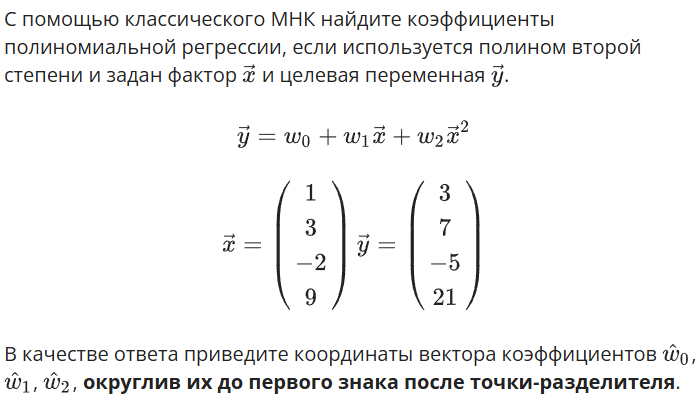

In [67]:
x = np.array([[1,3,-2,9]]).T
y = np.array([3,7,-5,21])

poly = PolynomialFeatures(degree=2, include_bias=True)
x_poly = poly.fit_transform(x)

w_hat = np.linalg.inv(x_poly.T@x_poly)@x_poly.T@y
print(w_hat.round(1))


[ 0.1  2.5 -0. ]


## Регуляризация